# CSE 252A Computer Vision I Fall 2017
## Assigment 1

---
This assignment contains theoretical and programming exercises. If you plan to submit hand written answers for theoretical exercises, please be sure your writing is readable and merge those in order with the final pdf you create out of this notebook. 

## Problem 1: Perspective Projection [5 pts]
Consider a perspective projection where a point 
$$
P = [\text{x y z}]^T
$$
is projected onto an image plane $\Pi'$ represented by $k = f'>0$ as shown in the following figure.
<img src="fig1.png">
The first second and third coordinate axes are denoted by i,j,k respectively. 

Consider the projection of a ray in the world coordinate system
$$
Q = [\text{2 -3 0}] + t[\text{0 2 1}]
$$
where $-\infty \leq t \leq -1$. 

Calculate the coordinates of the endpoints of the projection of the ray onto the image plane.

## Problem 2: Thin Lens Equation [5 pts]
<img src = "fig2.png">
An illuminated arrow forms a real inverted image of itself at a distance of w = 90cm, measured along the optical axis of a convex thin lens as shown above. The image is half the size of the object

1.  How far from the object must the lens be placed?
2.  What is the focal length of the lens?
3.  Suppose the arrow moves x cm to the right while the lens and image plane remain fixed.  This will result in an out of focus image; what is the radius of the corresponding blur circle formed from the tip of the arrow on the image plane assuming the diameter of the lens is d?

## Problem 3: Affine Projection [5 pts]
Consider an affine camera and a line in 3D space.  Consider three points (A, B, and C) on that line, and the image of those three points (a, b and c).  Now consider the distance between a and b and the distance between a and c.  Show that the ratio of the distance is independent of the direction of the line.

## Problem 4: Image Formation and Rigid Body Transformations [10 points]

In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the projective and affine camera model. The goal will be to photograph the following four points 
$$^AP_1 = [\text{-1 -0.5 2}]^T$$,  $$^AP_2 = [\text{1 -0.5 2}]^T$$, $$^AP_3 = [\text{1 0.5 2}]^T$$, $$^AP_4 = [\text{-1 0.5 2}]^T$$

To do this we will need two matrices.  Recall, first, the following formula for rigid body transformation
$$
^BP = \text{ } ^B_BR\text{ }^AP + \text{ } ^BO_A
$$
Where $^BP$ is the point coordinate in the target (B) coordinate system. $^AP$ is the point coordinate in the source (A) coordinate system. $^B_AR$ is the rotation matrix from A to B, and $^BO_A$ is the origin of the coordinate system A expressed in B coordinates. 

The rotation and translation can be combined into a single 4X4 extrinsic parameter matrix, $P_e$, so that $^BP = P_e*\text{ }^AP$.

Once transformed, the points can be photographed using the intrinsic camera matrix, $P_i$ which is a 3X4.

Once these are found, the image of a point, $^AP$, can be calculated as $P_i*P_e*\text{ }^AP$.

We will consider four different settings of focal length, viewing angles and camera positions below. For each of these calculate:

a). the extrinsic transformation matrix,

b). intrinsic camera matrix under the perspective camera assumption.

c). intrinsic camera matrix under the affine camera assumption.  In particular, around what point do you do the taylor series expansion?

d).Calculate the image of the four vertices and plot using the supplied **plotsquare** function (see e.g.  output in figure below).
<img src="fig3.png">
1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. $^BO_A = [\text{0 0 1}]^T$. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 1}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 5. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 13}]^T$.

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and defines  the  coordinates  of  the  center  of  the  image),  but  only  parameterize  this  with f,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is f, and the only ones under the affine assumption are: f, $x_0,y_0,z_0$, where $x_0,y_0,z_0$ is the center of the taylor series expansion.

Include a image like above.  Note that the axis are the same for each row, to facilitate comparison between the two camera models.  Also include:
1. The  actual  points  around  which  you  did  the  taylor  series  expansion  for  the  affine  camera models.
2. How did you arrive at these points?
3. How do the projective and affine camera models differ?  Why is this difference smaller for the last image compared to the second last?

Note: this is a programming exercise.

[[-0.5   0.5   0.5  -0.5 ]
 [-0.25 -0.25  0.25  0.25]]
[[-0.5   0.5   0.5  -0.5 ]
 [-0.25 -0.25  0.25  0.25]]


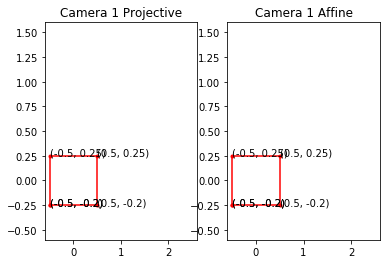

[[-0.33333333  0.33333333  0.33333333 -0.33333333]
 [-0.16666667 -0.16666667  0.16666667  0.16666667]]
[[-0.33333333  0.33333333  0.33333333 -0.33333333]
 [-0.16666667 -0.16666667  0.16666667  0.16666667]]


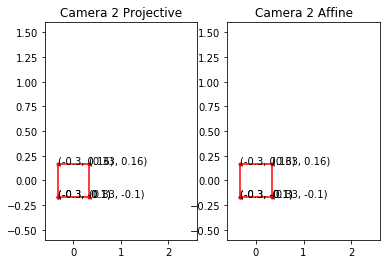

[[ 0.56208473  2.21584672  1.39110445  0.39576457]
 [-0.36827118  0.06481636  0.63621457 -0.02258121]]
[[ 0.48100953  1.56354128  1.25104128  0.16850953]
 [-0.46650635  0.03349365  0.46650635 -0.03349365]]


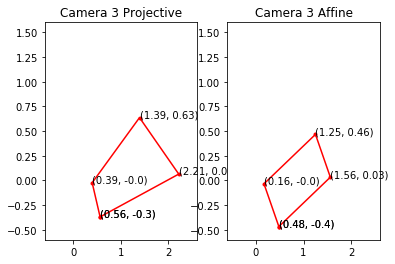

[[ 0.48991596  0.87853018  0.75745834  0.39222183]
 [-0.32098707  0.02569814  0.34641973 -0.02237907]]
[[ 0.48501264  0.86058488  0.75216651  0.37659427]
 [-0.33321882  0.02392404  0.33321882 -0.02392404]]


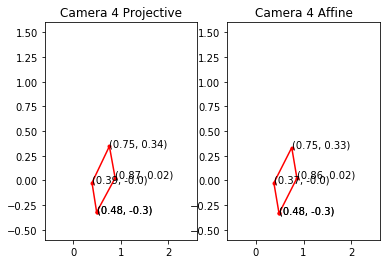

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
# convert points from euclidian to homogeneous
def to_homog(points):
    temp=np.array([points.shape[1]*[1]])
    points_homog=np.concatenate((points,temp),axis=0)
    return points_homog

# convert points from homogeneous to euclidian
def from_homog(points_homog):

    for i in range(0,points_homog.shape[1]):
        points_homog[:,i]= [x*1.0/points_homog[-1,i] for x in points_homog[:,i]]
    points_homog=points_homog[0:-1]
    return points_homog

# project 3D euclidian points to 2D euclidian
def project_points(P_int, P_ext, pts):
    pts_homog=to_homog(pts)
    pts2d_homog=np.dot(np.dot(P_int,P_ext),pts_homog)
    return from_homog(pts2d_homog)
def camera1():
    """
    replace with your code
    """
    P_int_proj = np.eye(3,4)
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    P_int_affine[0,0]=0.5
    P_int_affine[1,1]=0.5
    P_int_affine[2,2]=0
    P_int_affine[2,3]=1
    return P_int_proj, P_int_affine, P_ext

def camera2():
    """
    replace with your code
    """
    P_int_proj = np.eye(3,4)
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    P_ext[2,3]=1
    P_int_affine[0,0]=1.0/3
    P_int_affine[1,1]=1.0/3
    P_int_affine[2,2]=0
    P_int_affine[2,3]=1

    return P_int_proj, P_int_affine, P_ext

def camera3():
    """
    replace with your code
    """
    P_int_proj = np.eye(3,4)
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    R1=np.eye(3,3)
    R1[0,0]=math.sqrt(3)/2
    R1[0,1]=-0.5
    R1[1,0]=0.5
    R1[1,1]=math.sqrt(3)/2
    R2=np.eye(3,3)
    R2[0,0]=0.5
    R2[0,2]=math.sqrt(3)/2
    R2[2,0]=-math.sqrt(3)/2
    R2[2,2]=0.5
    R=np.dot(R2,R1)
    P_ext[0:3,0:3]=R
    P_ext[2,3]+=1
    z=np.array([0,0,2])
    res=np.matmul(R,z)
    P_int_affine[0,0]=1.0/(res[2]+1)
    P_int_affine[1,1]=1.0/(res[2]+1)
    P_int_affine[0,2]=-1.0*res[0]/(res[2]+1)**2
    P_int_affine[0,3]=1.0*res[0]/(res[2]+1)
    P_int_affine[2,2]=0
    P_int_affine[2,3]=1


    
    return P_int_proj, P_int_affine, P_ext

def camera4():
    """
    replace with your code
    """
    P_int_proj = np.eye(3,4)
    P_int_proj[2,2]=0.2
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    P_ext[2,3]=13
    R1=np.eye(3,3)
    R1[0,0]=math.sqrt(3)/2
    R1[0,1]=-0.5
    R1[1,0]=0.5
    R1[1,1]=math.sqrt(3)/2
    R2=np.eye(3,3)
    R2[0,0]=0.5
    R2[0,2]=math.sqrt(3)/2
    R2[2,0]=-math.sqrt(3)/2
    R2[2,2]=0.5
    R=np.dot(R2,R1)
    P_ext[0:3,0:3]=R
    z=np.array([0,0,2])
    res=np.matmul(R,z)
    P_int_affine[0,0]=5.0/(res[2]+13)
    P_int_affine[1,1]=5.0/(res[2]+13)
    P_int_affine[0,2]=-5.0*res[0]/(res[2]+13)**2
    P_int_affine[0,3]=5.0*res[0]/(res[2]+13)
    P_int_affine[2,2]=0
    P_int_affine[2,3]=1
    return P_int_proj, P_int_affine, P_ext


#######################################################
# test code. Do not modify
#######################################################

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    print points
    if title:
        plt.title(title)
    if axis:
        plt.axis(axis)
    for xy in zip(points[0,inds], points[1,inds]): 
        plt.annotate('(%.4s, %.4s)' % xy, xy=xy, textcoords='data')
        
def main():
    point1 = np.array([[-1,-.5,2]]).T
    point2 = np.array([[1,-.5,2]]).T
    point3 = np.array([[1,.5,2]]).T
    point4 = np.array([[-1,.5,2]]).T
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
        P_int_proj, P_int_affine, P_ext = camera()
        plt.subplot(1, 2, 1)
        plot_points(project_points(P_int_proj, P_ext, points), title='Camera %d Projective'%(i+1), axis=[-0.6,2.6,-0.6,1.6])
        plt.subplot(1, 2, 2)
        plot_points(project_points(P_int_affine, P_ext, points), title='Camera %d Affine'%(i+1), axis=[-0.6,2.6,-0.6,1.6])
        plt.show()

main()


For all affine camera models, I use taylor series expansion. For camera 1, round point [0 0 2]. For Camera2 around points[0 0 3]. For carera 3, First apply rotate matrix to [0 0 2], then add 1 along z axis. For camera4, first apply rotate matrix to [0 0 2], then add 13 along z axis. Also change the focal length from 1 to 5.

After getting all points, we need to rewrite affine camera model in terms of Homogeneous Coordinate, which is 
[f/z0 0 -fx0/z0^2 fx0/z0;0 f/z0 -fy0/z0^2 fy0/z0; 0 0 0 1]


For the third model, the affine model is parallelogram while the perspective model is not. For fourth camera, the two models are very similar but they are not the same. The reason why it has so much difference with the third camera is becasue the focal length for the camera is 5 instead of 1, making the differences look smaller than the third camera.

## Problem 5: Image warping and merging [10 pts]

You may use eig or svd routines in python for this part of the assignment.

We consider a vision application in which components of the scene are replaced by components from another image scene. 

Consider for a moment that you are watching a sporting event  on  television  whose audience,  which  has  a  broad,  possibly  multinational  audience. During these events, it is advantageous and profitable to use different advertisements in different markets to target more directly viewers in those regions. 

In this assignment you will implement a simple version  of  this  algorithm  using  multiple  advertisements  on  a  single  scene. Given  two  scenes,  the natural thing to do would be to compute how your object of interest is observed in the current scene and warp it to match the destination scene. This would allow you to paste together the two images where your new advertisement overlaps the particular billboard in the new scene even though these two images were obtained in different locations. 

This digital replacement is accomplished by a set of points for each advertisement in both the target (scene) and advertisement images. The task then consists of mapping the points from the advertisement to their respective points in the target image. In the most general case, there would be no constraints on the scene geometry, making the problem quite hard to solve. If, however, the scene can be approximated by a plane in 3D, a solution can be formulated much more easily even without the knowledge of camera calibration parameters. 

To solve this section of the homework, you will begin by deriving the transformation that maps one image onto another in the planar scene case. Then you will write a program that implements this transformation and uses it to warp some UCSD logos into an art gallery.

To begin with, we consider the projection of planes in images. imagine two cameras $C_1$ and $C_2$ looking at a plane $\pi$ in the world. Consider a point P on the plane $\pi$ and its projection $p=[\text{u1, v1, 1}]^T$ in the image 1 and $q=[\text{u2, v2, 1}]^T$ in image 2.

**Fact 1**: These exists a unique, upto scale, 3X3 matrix H such that, for any point P:
$$q \approx Hp$$
Here $\approx$ denotes equality in homogeneous coordinates, meaning that the left and right hand sides are proportional. Note that H only depends on the plane and the projection matrices of the two cameras.

The interesting thing about this result is that by using H we can compute the image of P that would be seen in the camera with center $C_2$ from the image of the point in the camera with center at $C_1$, without knowing the three dimensional location. Such an H is a projective transformation of the plane, called a homography.

In this problem, complete the code for computeH and warp functions that can be used in the skeletal code that follows. 
1. In the code snippets, the source image refers to the image(default: ucsd_logo.png) that needs to be replaced into the target image(joan_clancy_gallery.jpg). You may use any other source image for of your choice for this exercise.
2. The skeletal code has a composite function which is complete and will be used to merge the target_image and the warped source image so that the region in the target image is replaced by the source image. This function is fully implemented.
3. You will have to implement the computeH function that computes a homography from the target image to the source image. It takes in the point correspondences between the source image and target image in homogeneous coordinates respectively and returns a 3X3 homography matrix.
4. You will also have to implement the warp function that maps the source image into the target image plane. It takes in the source image, the points enclosing the region in the target to be replaced and the size of the target plane respectively. It returns the warped source image onto the target plane and a mask that indicates the regions to be filled in by the original target image. This mask is used in the composite function later.

Note: We have provided test code to check if your implementation for computeH is correct. All the code to plot the results needed is also provided along with the code to read in the images and other data required for this problem. Please try not to modify that code. 

You may find following python built-ins helpful:
numpy.linalg.svd, numpy.meshgrid

[[ 167.91941355  215.48473205  216.31921132  169.03205258]
 [  80.23728223   78.54912892  119.40243902  118.05191638]]


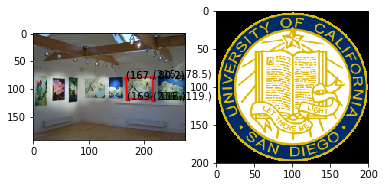

In [38]:
import numpy as np
from scipy.misc import imread, imresize
from scipy.io import loadmat
import matplotlib.pyplot as plt

# load images to be used
I1 = imresize(imread('joan_clancy_gallery.jpg'),.1)[:,:,:3]/255.

#You can use any image here. We would love to see your face in that gallery!!
I2 = imread('ucsd_logo.png')[:,:,:3]/255.

# load target points
target_points = np.load('gallerypoints.npy')/10

# display images
plt.subplot(1, 2, 1)  # first plot
plt.imshow(I1)
#plt.plot(points[0,0],points[1,0],'.r')
plot_points(target_points)

plt.subplot(1, 2, 2)  # first plot
plt.imshow(I2)
plt.show()

[[ 0.   1.   1.   0. ]
 [ 0.5  0.5  1.5  1.5]]
[[ 0  1  2 -1]
 [ 0  0  1  1]]
[[  7.78888909e-17   1.00000000e+00   2.00000000e+00  -1.00000000e+00]
 [ -1.03851855e-16  -1.55777782e-16   1.00000000e+00   1.00000000e+00]]


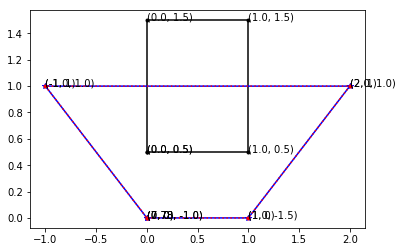

The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.


In [39]:
def computeH(source_points, target_points):
    # returns the 3x3 homography matrix such that:
    # np.matmul(H, source_points) ~ target_points
    # where source_points and target_points are expected to be in homogeneous
    
    # Please refer the note on DLT algorithm given at: 
    # https://cseweb.ucsd.edu/classes/wi07/cse252a/homography_estimation/homography_estimation.pdf
    # make sure points are 3D homogeneous
    assert source_points.shape[0]==3 and target_points.shape[0]==3
    
    x_p=target_points[0]/target_points[2]
    y_p=target_points[1]/target_points[2]
    x=source_points[0]
    y=source_points[1]
    a=np.zeros((8,9))
    row=0
    for i in range(0,4):
        a[row]=[-x[i],-y[i],-1,0,0,0,x_p[i]*x[i],x_p[i]*y[i],x_p[i]]
        a[row+1]=[0,0,0,-x[i],-y[i],-1,y_p[i]*x[i],y_p[i]*y[i],y_p[i]]
        row+=2
    U, s, V = np.linalg.svd(a, full_matrices=True)
    H=V[-1].reshape(3,3)

    return H

#######################################################
# test code. Do not modify
#######################################################
def test_computeH():
    source_points = np.array([[0,0.5],[1,0.5],[1,1.5],[0,1.5]]).T
    target_points = np.array([[0,0],[1,0],[2,1],[-1,1]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    mapped_points = from_homog(np.matmul(H,to_homog(source_points)))

    plot_points(source_points,style='.-k')
    plot_points(target_points,style='*-b')
    plot_points(mapped_points,style='.:r')
    plt.show()
    print 'The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.'
test_computeH()

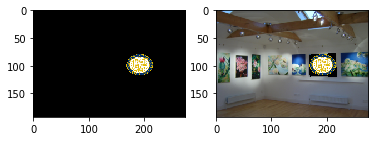

In [40]:
from numpy.linalg import inv

def warp(source_img, target_points, target_size):
    # make sure the new image (of size target_size) has the same number of color channels as img
    assert target_size[2]==source_img.shape[2]
    
    source_points=np.array(([0,199,199,0],[0,0,199,199]))
    H = computeH(to_homog(source_points), to_homog(target_points))
    warp_img=np.zeros_like(I1)
    mask=np.ones_like(I1)
    for i in range(0,200):
        for j in range(0,200):
            temp=from_homog(np.matmul((H),to_homog(np.array(([i],[j]))))).astype(int)
            if temp[0]>216:
                temp[0]-=1
            if temp[0]<170:
                temp[1]+=1
            if temp[1]>119:
                temp[1]-=1
            if temp[1]<78:
                temp[1]+=1
            warp_img[temp[1],[temp[0]]]=I2[j][i]
            mask[temp[1],[temp[0]]]=np.array([ 0.,  0.,  0.])
    return warp_img, mask

def composite(img1, img2, mask):
    # returns a new image that contains pixels from img1 where mask is true and img2 where mask is false
    return img1*mask + img2*(1-mask)
    


#######################################################
# test code. Do not modify
#######################################################
I2_warp, mask = warp(I2, target_points, I1.shape)
I3 = composite(I1, I2_warp, mask)
plt.subplot(1, 2, 1)  # first plot
plt.imshow(I2_warp)
plt.subplot(1, 2, 2)  # first plot
plt.imshow(I3)
plt.show()